Introduction

Frauds are a serious issue in our society and can have devastating impacts on the economy if went unnoticed. 

This is where the task of auditors becomes of great significance. Audits are impartial, thorough inspections of companies'reported financial statements performed by authorized auditors with the ultimate goal of verifying their accuracy. The auditor then makes a final judgement taking into consideration various factors such as previous records of the company and their reputation history to determine whether they've been reported in good faith and are error-free, representing the exact financial state of the company or have been misrepresented in one form or another. 

Financial claims are created internally by the firm itself and so the risk of mis-statements whether it being due to mere errors while making the report or deliberate manipulation by the company itself is very much extant. Manipulations of financial claims are made by fraudulent firms to make their company seem "better" than what it actually. Some examples of this include but are not limited to : overstating their revenues and assets and understating their yearly losses to encourage investors to invest into their company. 

With all the above considered, it goes without saying that an auditor's job is a very meticulous one and thus auditing offices have started looking into machine-learning algorithms that aids auditors in making the correct judgement on the possibility of fraud existing within a company's reported financial claims. The goal of this project is to create a k-nearest neighbor classifical model that can accurately predict the risk levels of a company being associated with fraud. 

The question that we will try to address in this analysis is as follows: 

Is a given company suspicious of fraud or not given various data that can be used as predictor variables in our algorithm?

The dataset that will be used to train our classification model is one that stores one year's worth of non-confidential data (2015-2016) of various firms collected from the Audit Office of India. 



Rows: 776
Columns: 27
$ Sector_score   <dbl> 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3.89, 3…
$ LOCATION_ID    <chr> "23", "6", "6", "6", "6", "6", "7", "8", "8", "8", "8",…
$ PARA_A         <dbl> 4.18, 0.00, 0.51, 0.00, 0.00, 0.00, 1.10, 8.50, 8.40, 3…
$ Score_A        <dbl> 0.6, 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.6, 0.6, 0.6, 0.6, …
$ Risk_A         <dbl> 2.508, 0.000, 0.102, 0.000, 0.000, 0.000, 0.440, 5.100,…
$ PARA_B         <dbl> 2.50, 4.83, 0.23, 10.80, 0.08, 0.83, 7.41, 12.03, 11.05…
$ Score_B        <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.4, 0.6, 0.6, 0.2, 0.6, …
$ Risk_B         <dbl> 0.500, 0.966, 0.046, 6.480, 0.016, 0.166, 2.964, 7.218,…
$ TOTAL          <dbl> 6.68, 4.83, 0.74, 10.80, 0.08, 0.83, 8.51, 20.53, 19.45…
$ numbers        <dbl> 5.0, 5.0, 5.0, 6.0, 5.0, 5.0, 5.0, 5.5, 5.5, 5.0, 5.0, …
$ Score_B.1      <dbl> 0.2, 0.2, 0.2, 0.6, 0.2, 0.2, 0.2, 0.4, 0.4, 0.2, 0.2, …
$ Risk_C         <dbl> 1.0, 1.0, 1.0, 3.6, 1.0, 1.0, 1.0, 2.2, 2.2, 1.0, 1.0, …
$ Money_Value    <

Risk,count
<fct>,<int>
0,329
1,213


<<<<<<< local <modified: text/html, text/latex, text/markdown, text/plain>


$Inherent_Risk
[1] 17.70272

$Audit_Risk
[1] 8.00521

$TOTAL
[1] 14.20965

$Money_Value
[1] 13.10218

$Inherent_Risk
[1] 19.69874

$Audit_Risk
[1] 8.145701

$TOTAL
[1] 14.4596

$Money_Value
[1] NA

>>>>>>> remote <modified: text/html, text/latex, text/markdown, text/plain>
<<<<<<< local


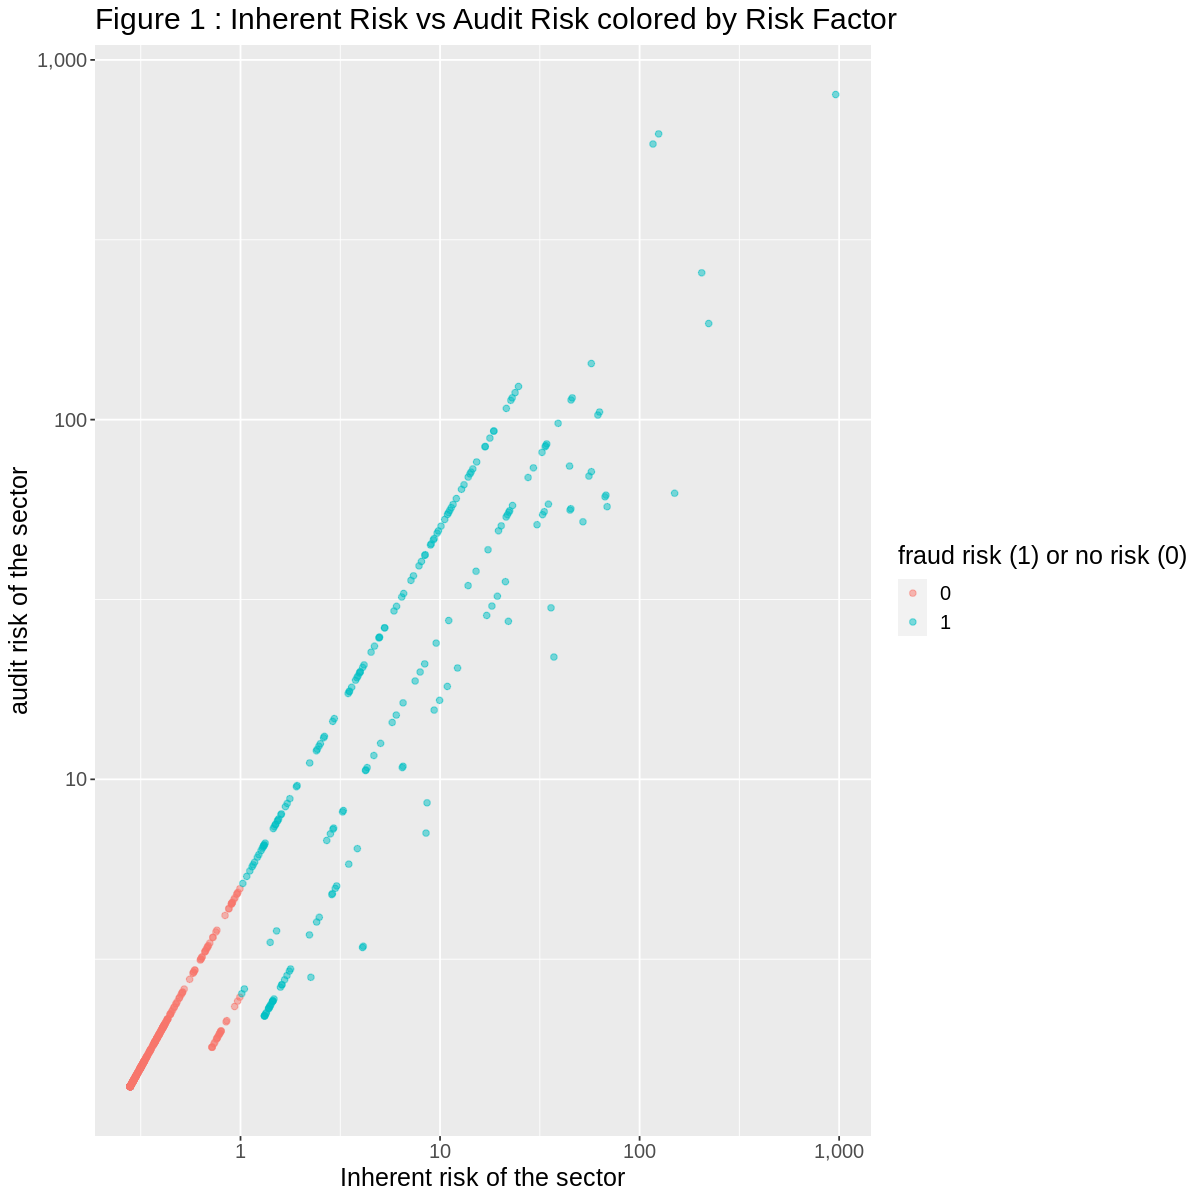

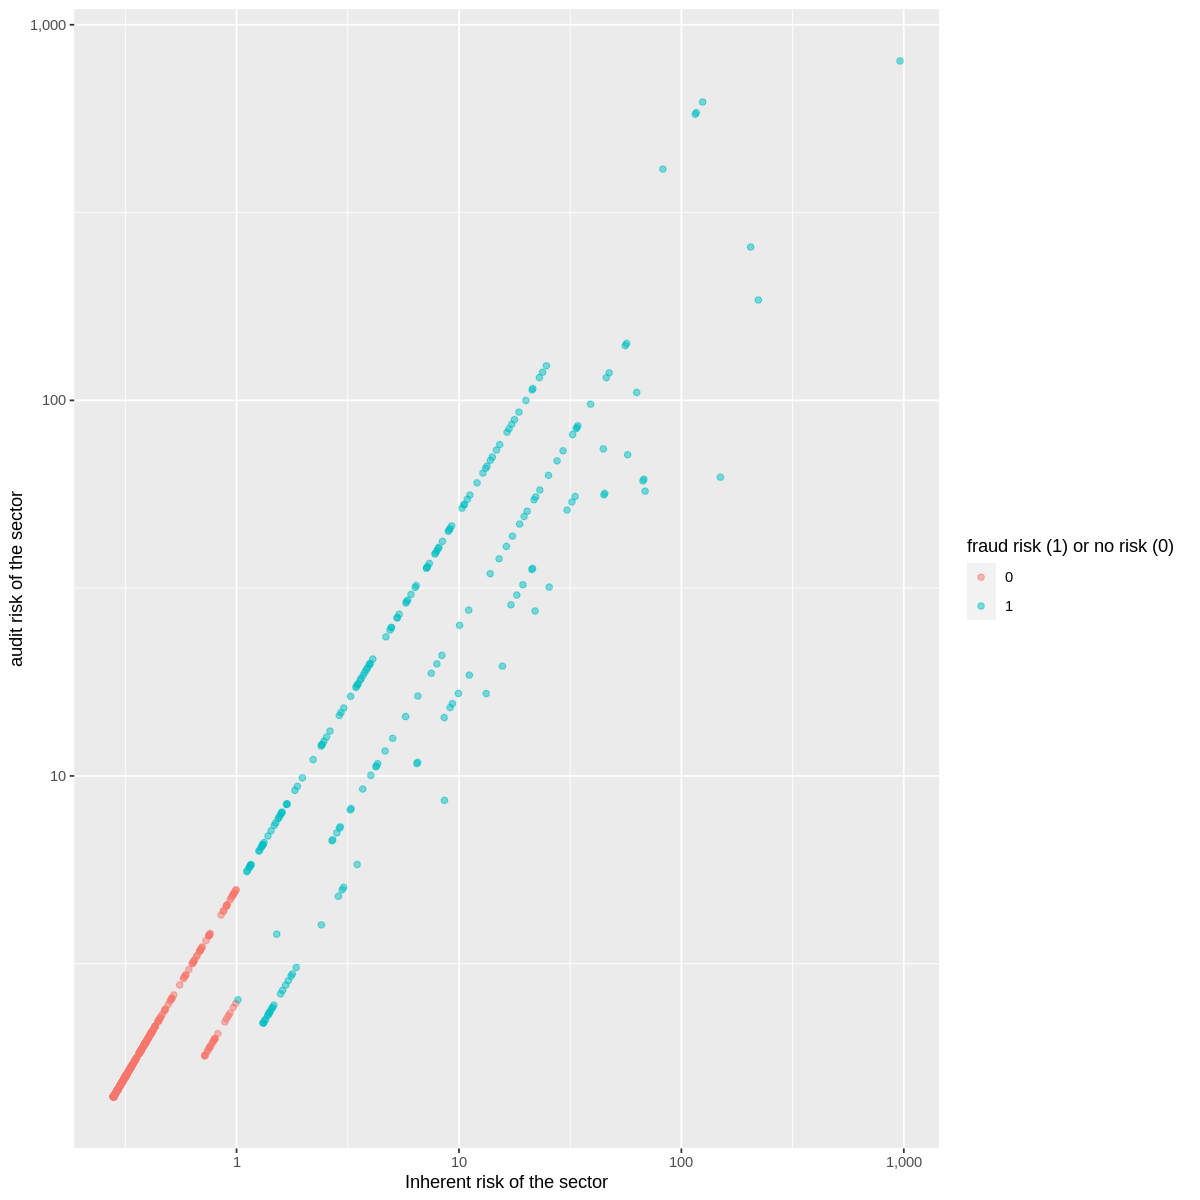

>>>>>>> remote


In [ ]:
library(tidyverse)
library(tidymodels)
library(repr)

audit_data <- read_csv("audit_risk.csv") |>
mutate(Risk = as_factor(Risk)) |>
glimpse() 


audit_split <- initial_split(audit_data, prop = 0.7, strata = Risk) 
audit_training <- training(audit_split)
audit_testing <- testing(audit_split)


audit_training |>
group_by(Risk) |>
summarize(count = n())


audit_training |>
select(Inherent_Risk, Audit_Risk, TOTAL, Money_Value) |> 
map(mean) #no rows contain missing values since map function gave us the mean values without having to state na.rm = True


options(repr.plot.width = 10, repr.plot.height = 10)

audit_visual <- audit_training |> 
ggplot(aes(x = Audit_Risk, y = Inherent_Risk, color = Risk)) +
geom_point(alpha = 0.5) + 
labs(x = "Inherent risk of the sector", y = "audit risk of the sector", color = "fraud risk (1) or no risk (0)") +
scale_x_log10(labels = comma) +
scale_y_log10(labels = comma)

audit_visual














The analysis will be conducted by first tuning our classification model using 5-fold cross validation to assess the accuracy for each value of numbers of neighbors "K" in a reasonable range. This will in turn help in our parameter selection namely in selection of the value of K with the highest estimated accuracy.

Peforming cross validation ensures that any one “random” validation set does not influence the reported accuracy too much (which would be the case if we only split the data once) by taking an average of the accuracy values across the different folds of the training data each of which has a distinct validation set. 

To assess the quality of our classifier on unseen data namely the testing set, we will retrain our model on the entire training set and using the already determined K value as the parameter. The accuracy of the model will then be scrutinized and determined if it is accurate enough for the context in which it will be applied in. 


The four predictor variables were chosen after critical analysis of their meanings. For example, inherent risk is the risk of financial misstatements occuring and caused by a factor other than simple unintended accounting errors. A struggling company would be more incentivized to misreport their financial state in order to save face possessing a higher inherent risk. In addition, cash transactions are a lot less likely to be traced compared to cheque transactions and thus fradulent companies resort to cash transactions a lot more frequently, an inherent risk. 

**Methods**



Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results



**Expected Outcomes and Significance**

Expected Findings:

The ultimate finding of this analysis is a prediction of the risk of a given company being associated with fraud represented by a score of 1 (fraudulent) or 0 (not fraudulent). 

Impact:

The impact of such finding is huge and potentially can emancipate global economies worldwide from financial strains imposed by fraudulent activities. It is estimated that a total of $5.7 trillion is lost on a global scale due to misrepresentation of financial statements by companies going unnoticed. Developing an accurate algorithm that can detect fraud behind the scenes of a company can significantly alleviate this astronomic financial loss. 


Future Questions:

A pertaining future question is the extent to which machine-based algorithms taking over audit offices can aid in reducing fraud worldwide? Will there be 20%, 50%, 75% less financial loss arising from fraud compared to times before the emergence of predictor models in auditing industry or will it be of no significant help? 



